In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
import pandas as pd
#from cycler import cycler
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')


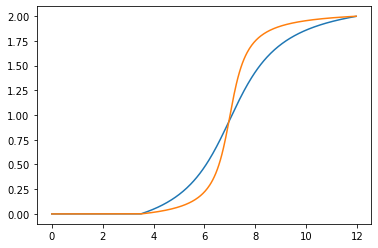

In [6]:

x = np.arange(0.0,12.0,0.03)

#plt.vlines(3.5, -0,1)
#plt.vlines(4.0, -0,1)

y = np.empty(0);


t0 = 3.5
tg= 1.5
tf = 12.0
R0 = 0
Rf = 2

for t in x:
    
    if t < 3.5:
        y = np.append(y, R0 )
    else:
        N = 1.0/(np.arctan((tf - (t0 + 3.5) )/tg) - np.arctan(-(t0 ) /tg))

        y = np.append(y, R0 + N*(Rf - R0) * (np.arctan( (t - (t0 +3.5) )/tg) - np.arctan(-(t0 )/tg)))

plt.plot(x,y)
        
y = np.empty(0);


t0 = 3.5
tg= 0.5
tf = 12.0
R0 = 0
Rf = 2

for t in x:
    
    if t < 3.5:
        y = np.append(y, R0 )
    else:
        N = 1.0/(np.arctan((tf - (t0 + 3.5) )/tg) - np.arctan(-(t0 ) /tg))

        y = np.append(y, R0 + N*(Rf - R0) * (np.arctan( (t - (t0 +3.5) )/tg) - np.arctan(-(t0 )/tg)))
    
    
plt.plot(x,y)

In [7]:
def mass_integrand(x):
    return -np.exp(-x) * (x + 1)

def surfaceDensity(r, w, totalGasMass, scaleLength):

        
    truncatedFactor = (1 - (1 + galaxyRadius / scaleLength) * np.exp(-galaxyRadius / scaleLength))
    prefactor = totalGasMass / (2 * np.pi * r * w) / truncatedFactor
    upRadius = (r + w / 2) / scaleLength
    downRadius = (r - w / 2) / scaleLength
    
    
    return prefactor * (mass_integrand(upRadius) - mass_integrand(downRadius))

def ringSurfaceDensity(r, w, totalGasMass, scaleLength):
    prefactor = 1.0  /(2 * np.pi * r * w)
    
    normExpFactor = (1 - (1 + galaxyRadius / scaleLength) * np.exp(-galaxyRadius / scaleLength))
    upRadius = (r + w / 2) / scaleLength
    downRadius = (r - w / 2) / scaleLength
    tot = (mass_integrand(upRadius) - mass_integrand(downRadius)) 
    
    add1 = r > 2*scaleLength - 0.005 
    add2 = r < 2*scaleLength + 0.005 
    add = add1&add2
    
    
    ringstrength = nuclearRingStrength/(1.0-nuclearRingStrength) * ( normExpFactor /(4 * np.pi *  scaleLength * 0.01))
    
    normFactor = normExpFactor + ringstrength *4 * np.pi *scaleLength*0.01 
    
    tot*= prefactor
    
    tot[add] += ringstrength
    
    tot *= totalGasMass/normFactor
    
    return tot

def newSurfaceDensity(r, w, totalGasMass, scaleLength):
    prefactor = 1.0  /(2 * np.pi * r * w)
    
    edge = 2*scalelength + nuclearRingWidth*0.5
    
    
    upRadius = (r + w / 2) / scaleLength
    downRadius = (r - w / 2) / scaleLength
    tot = (mass_integrand(upRadius) - mass_integrand(downRadius)) 
    

    
    #ringstrength = normExpFactor/0.01*(1/((1/0.2)-2*np.pi*width*scalelength))
    
    
    
    #normFactor = normExpFactor + ringstrength *2 * np.pi *width * scalelength*0.01
   
    
    # print('normExpfactor ' +str(normExpFactor))
    # print('normfactor ' +str(normFactor))
    # print('ringstrenght ' +str(ringstrength))
    # print('normring ' + str( ringstrength *2 * np.pi * scaleLength*0.01))
    
    add3 = r > edge
    
    tot[add3] *= np.exp((-(r[add3]-(edge)))/0.001)
    
    # normExpFactorIn = (1 - (1 + edge / scaleLength) * np.exp(-edge / scaleLength))
    
    normExpFactor = np.sum(tot)
    
    
#     normExpFactorIn = scaleLength*(1 - np.exp(-edge / scaleLength))
    
#     normExpFactorOut = (delta*scaleLength)/(delta + scaleLength) *np.exp(edge/delta)*(np.exp(-(galaxyRadius*(delta + scaleLength))/(delta*scaleLength)) + np.exp(-(edge*(delta + scaleLength))/(delta*scaleLength)))
    
    add1 = r > 2*scaleLength - nuclearRingWidth*0.5
    add2 = r < 2*scaleLength + nuclearRingWidth*0.5 
    add = add1&add2
    
    ringstrength = nuclearRingStrength/(1.0-nuclearRingStrength) * ( (normExpFactor ) /(4 * np.pi *  scaleLength * 0.01))
    
    normFactor = normExpFactor *(1+ nuclearRingStrength/(1.0-nuclearRingStrength))

    tot*= prefactor
    
    tot[add] += ringstrength
    
    tot *= totalGasMass/normFactor
    
    return tot



2611.309434621515
integralnew 1.010375
integralold 1.000000000000001
integralnew 1.0000094999750002
integralnew 0.9999800000000002
integralold 0.9999999999976599
integralold 1.000000000000008


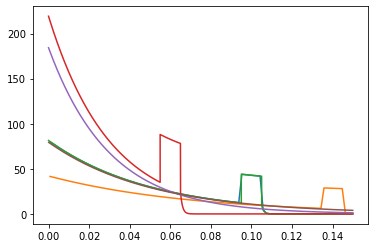

In [8]:

width = 0.0015
galaxyRadius = 0.15;

totalGasMass = 1
scalelength = 0.05
nuclearRingStrength = 0.2
nuclearRingWidth = 0.01
delta = 0.001


x = np.arange(width/2, galaxyRadius, width)


y = newSurfaceDensity(x, width, totalGasMass, scalelength)

print(np.sum(y))



plt.plot(x,y)

scalelength = 0.07
y = newSurfaceDensity(x, width, totalGasMass, scalelength)
z = surfaceDensity(x, width, totalGasMass, scalelength)
print('integralnew '+ str(np.sum(y*2*np.pi * x *width ) ))
print('integralold '+ str(np.sum(z*2*np.pi * x *width ) ))
plt.plot(x,y)


scalelength = 0.05
width = 0.0000015
x = np.arange(width/2, galaxyRadius, width)
y = newSurfaceDensity(x, width, totalGasMass, scalelength)
print('integralnew '+ str(np.sum(y*2*np.pi * x *width )))
plt.plot(x,y)


scalelength = 0.03
width = 0.0000015
x = np.arange(width/2, galaxyRadius, width)
y = newSurfaceDensity(x, width, totalGasMass, scalelength)
print('integralnew '+ str(np.sum(y*2*np.pi * x *width ) ))
plt.plot(x,y)

y = surfaceDensity(x, width, totalGasMass, scalelength)
print('integralold '+ str(np.sum(y*2*np.pi * x *width ) ))
plt.plot(x,y)

scalelength = 0.05
width = 0.0002
x = np.arange(width/2, galaxyRadius, width)
y = surfaceDensity(x, width, totalGasMass, scalelength)
print('integralold '+ str(np.sum(y*2*np.pi * x *width ) ))
plt.plot(x,y)

[0.00725 0.02225 0.03725 0.05225 0.06725 0.08225 0.09725 0.11225 0.12725
 0.14225]
123.87506127134417
0.8008517265285442


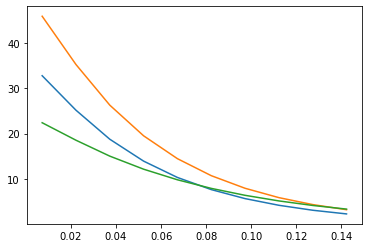

In [9]:
x = np.arange(0.00725, 0.15,0.015)


galaxyRadius = 0.15;

y = surfaceDensity(x, 0.015, 0.5, 0.05)
plt.plot(x,y)

print(x)
print(np.sum(y) )

print((1 - (1 + galaxyRadius / 0.05) * np.exp(-galaxyRadius / 0.05)))
#print((np.pi*0.15**2))
#print(np.sum(y) *0.015 *(np.pi*0.15**2))


y = surfaceDensity(x, 0.015, 0.7, 0.05)
plt.plot(x,y)

y = surfaceDensity(x, 0.015, 0.5, 0.07)
plt.plot(x,y)